In [1]:
import pyfiles.HFSAnalyzer as HFSA
reload(HFSA)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
sns.set_style('white')
sns.set_palette('colorblind')
%matplotlib inline

df = HFSA.directory_to_df()
df = df.sort_values(by='Nk')

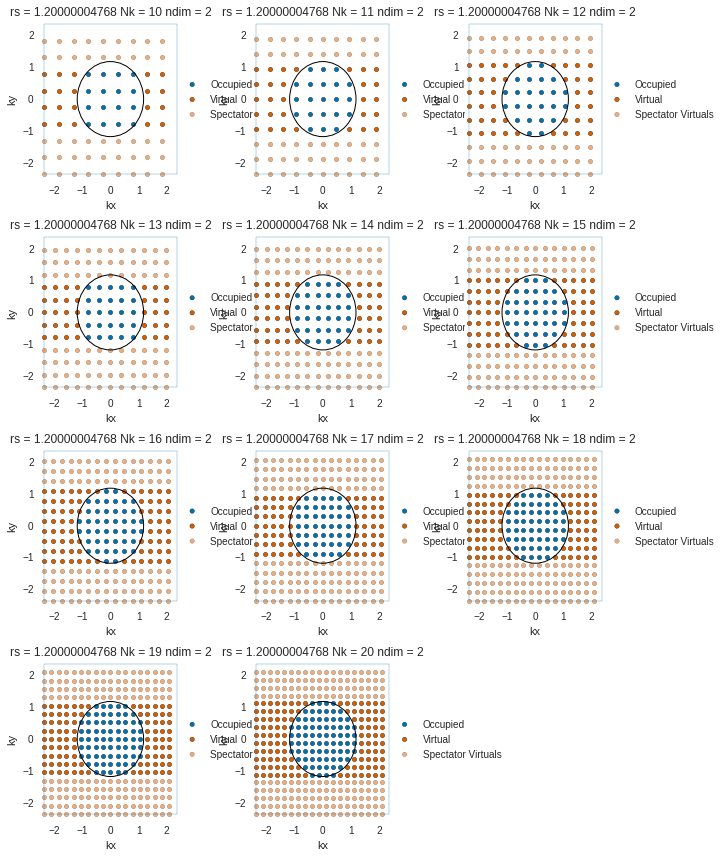

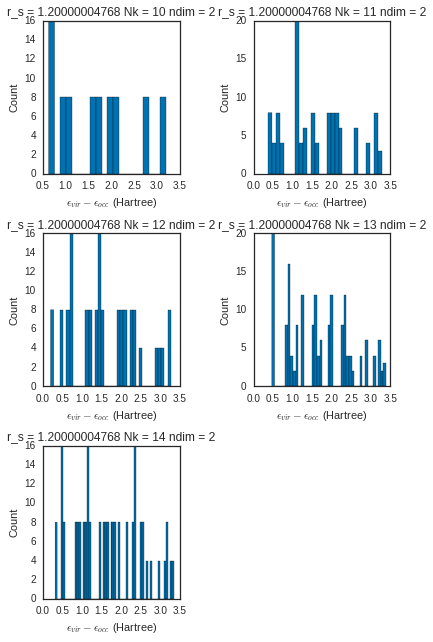

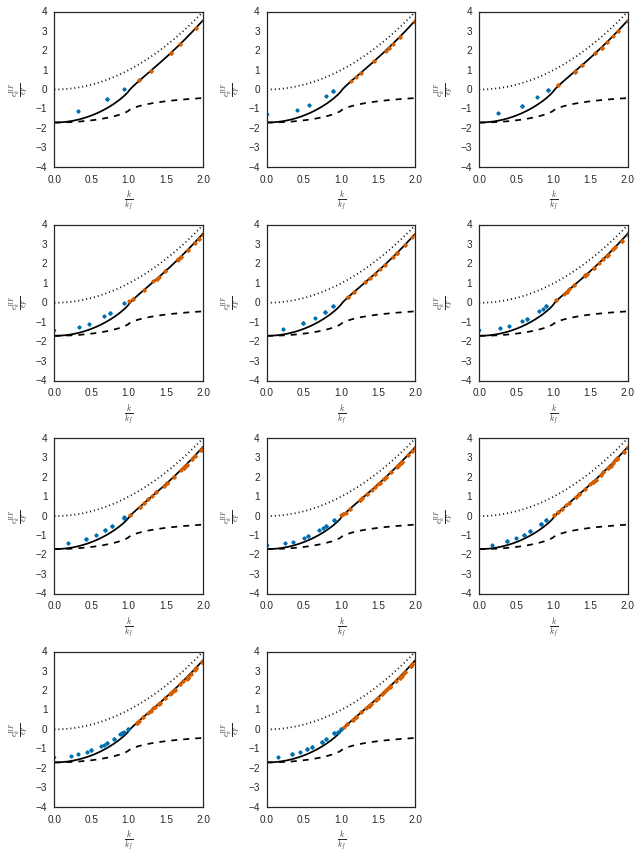

In [2]:

fig = plt.figure()
axplot = HFSA.axplot_1stBZ
kwargs = {'spec_alpha' : 0.5 , 'scale' : 1.05, 'labels' : True}
fig, axes = HFSA.df_ApplyAxplotToRows(df, None, axplot, **kwargs)
plt.tight_layout()
plt.show()

fig = plt.figure()
axplot = HFSA.axplot_exc_hist
fig, axes =  HFSA.df_ApplyAxplotToRows(df[:5], None, axplot)
plt.tight_layout()
plt.show()

plt.figure()
HFSA.df_ApplyAxplotToRows(df, None, HFSA.axplot_energy_compare)
plt.tight_layout()
plt.show()


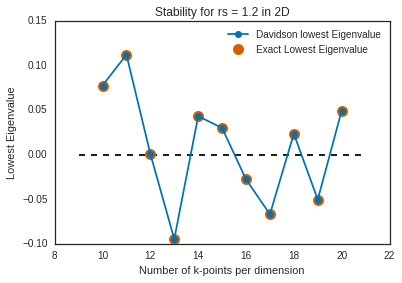

In [3]:
fig = plt.figure()
HFSA.plot_dav_vs_full(df)
plt.show()

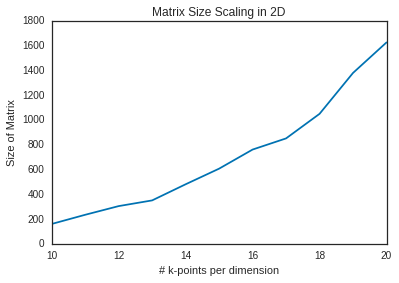

In [4]:
plt.figure()
Nexcs = df.Nexc.as_matrix()
Nks = df.Nk.as_matrix()
plt.plot(Nks, 2*Nexcs)
plt.xlabel('# k-points per dimension')
plt.ylabel('Size of Matrix')
plt.title('Matrix Size Scaling in 2D')
plt.show()

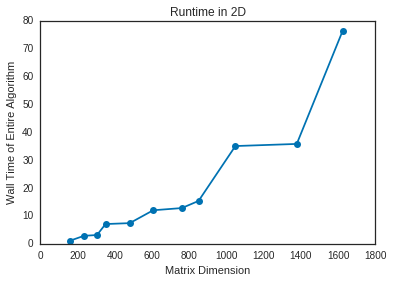

In [5]:
Walltime = [float(s.split()[0]) for s in df['Total Elapsed Time']]
Nexcs = df.Nexc.as_matrix()
plt.title('Runtime in 2D')
plt.xlabel('Matrix Dimension')
plt.ylabel('Wall Time of Entire Algorithm')
plt.plot(2*Nexcs, Walltime, 'o-')
plt.show()

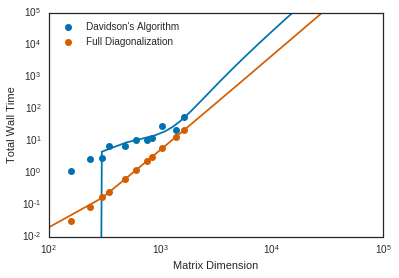

In [6]:
Nmat = 2 * df.Nexc.as_matrix()
Davtimes =  df.Dav_time.as_matrix()

df_with_fulldiags = df[df['full_diag_min'].notnull()]
fulltimes = df_with_fulldiags.full_diag_time.as_matrix()
Nmatfull = 2 * df_with_fulldiags.Nexc.as_matrix()

fullorder = 3
c = np.polyfit(Nmatfull, fulltimes, fullorder)
cdav = np.polyfit(Nmat, Davtimes, 3)


xmax = 1e5
xmin = 1e2
Nfit = np.linspace(xmin, xmax, 500)
fit = Nfit**3 * c[0] + Nfit**2 * c[1] + Nfit * c[2] + c[3]

davfit = Nfit**3 * cdav[0] + Nfit**2 * cdav[1] + Nfit * cdav[2] + cdav[3]

fig = plt.figure()
plt.plot(Nmat, Davtimes, 'o', label="Davidson's Algorithm", c=sns.color_palette()[0])
plt.plot(Nfit, davfit, c=sns.color_palette()[0])
plt.plot(Nmatfull, fulltimes, 'o', label='Full Diagonalization', c=sns.color_palette()[2])
plt.plot(Nfit, fit, c=sns.color_palette()[2])
plt.xlabel('Matrix Dimension')
plt.ylabel('Total Wall Time')
plt.legend(loc='best')
ax = plt.gca()
ax.set_xlim([xmin, xmax])
ax.set_ylim([1e-2, 1e5])
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

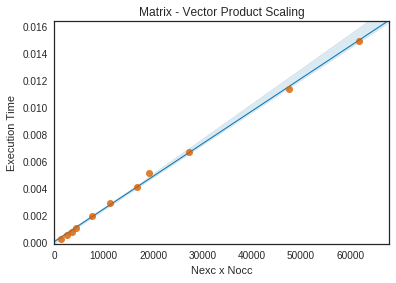

In [7]:
plt.figure()
Nexcs = df['Nexc']
Noccs = df['Nocc']
mvtimes = df['Mv_time']


plt.title('Matrix - Vector Product Scaling')

sns.regplot(Nexcs*Noccs, mvtimes, scatter_kws={'color' : sns.color_palette()[2], 's' : 50, 'zorder' : 2}
                                , line_kws={'zorder' : 1, 'linewidth' : 1})
plt.xlabel('Nexc x Nocc')
plt.ylabel('Execution Time')
ax = plt.gca()
scale = 1.1
ax.set_xlim(0, np.amax(Nexcs * Noccs)*scale)
ax.set_ylim(0, np.amax(mvtimes)*scale)
plt.show()

Series([], Name: Nk, dtype: int64)


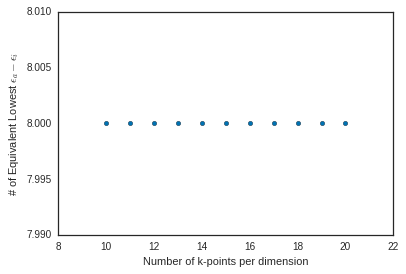

In [8]:
plt.figure()
degen = df['ground_state_degeneracy']
Nks = df.Nk.as_matrix()
plt.scatter(Nks, degen, c=sns.color_palette()[0])
plt.ylabel('# of Equivalent Lowest $\epsilon_a - \epsilon_i$')
plt.xlabel('Number of k-points per dimension')
print df[(df['ground_state_degeneracy'] == 4)].Nk
plt.show()

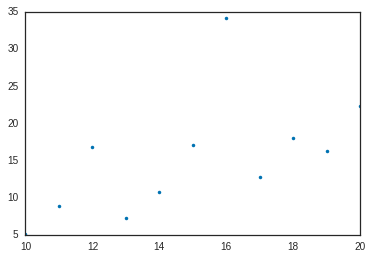

In [9]:
plt.figure()
plt.plot(df['Nk'], df['cond_number'], '.')
plt.show()

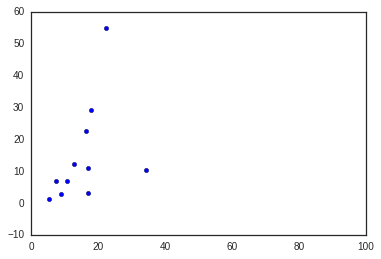

In [10]:
plt.figure()
plt.scatter(df['cond_number'], df['Dav_time'])
plt.gca().set_xlim(0,100)
plt.show()